## House Price Prediction - Assignment By Rama Boya

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The solution is divided into the following sections: 
- 1. Data understanding and exploration
- 2. Data cleaning
- 3. Data preparation
- 4. Model building and evaluation

### 1. Data Understanding and Exploration

Have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from scipy.stats import norm
from scipy import stats
%matplotlib inline

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
house_data = pd.read_csv("train.csv", na_values="NAN")

In [3]:
house_data.shape

(1460, 81)

There are total 1460 observations or records and 81 attributes or features

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are 38 numerical features, 43 categorical features and total sums upto 81 features

In [5]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# all numeric (float and int) variables in the dataset
house_numeric = house_data.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### 2. Data cleaning

#### Study Missing values

In [8]:
house_data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

There are four features that have significant number of missing values out of 1460 records<br>
  Other features that have missing values <br>
  FireplaceQu --> 690 houses has no fireplace <br>
  LotFrontage --> 259 houses has no information about street connected to property <br>
  GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual  --> 81 houses has no garage <br>
  BsmtExposure,BsmtFinType2,BsmtFinType1  --> 37 houses has no basement  
  **PoolQC(Poor Quality) --> 1453 out of 1460 values are missing <br>
  MiscFeature --> 1406 out of 1460 values are missing <br>
  Alley --> 1369 out of 1460 houses has no alley access <br>
  Fence --> 1179 out of 1460 houses has no fence** <br>

**As the PoolQC and MiscFeature has significant missing values and these features are independent, we can safely remove these features or columns**

In [9]:
house_data.drop(['PoolQC','MiscFeature','MSSubClass'], axis = 1, inplace = True)
house_data.drop(['OverallQual', 'OverallCond', 'YearBuilt'], axis = 1, inplace = True)
house_data.drop(['YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath'], axis = 1, inplace = True)
house_data.drop(['FullBath', 'HalfBath', 'BedroomAbvGr'], axis = 1, inplace = True)
house_data.drop(['KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'], axis = 1, inplace = True)
house_data.drop(['GarageYrBlt', 'GarageCars','MoSold', 'YrSold'], axis = 1, inplace = True)
house_data.shape

(1460, 62)

**Impute below features** <br>
   Alley,Fence,FireplaceQu,GarageCond,GarageType,GarageFinish,GarageQual,<br>
   BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual features 
   **as NO instead of NA** <br>
   to represent no Alley,Fence,Fireplace,Garage,Basement respectively**

In [10]:
house_data.Alley.fillna('No Alley',inplace=True)
house_data.Fence.fillna('No Fence',inplace=True)
house_data.FireplaceQu.fillna('No Fireplace',inplace=True)
house_data.GarageCond.fillna('No Garage',inplace=True)
house_data.GarageType.fillna('No Garage',inplace=True)
house_data.GarageFinish.fillna('No Garage',inplace=True)
house_data.GarageQual.fillna('No Garage',inplace=True)
house_data.BsmtExposure.fillna('No Basement',inplace=True)
house_data.BsmtFinType2.fillna('No Basement',inplace=True)
house_data.BsmtFinType1.fillna('No Basement',inplace=True)
house_data.BsmtCond.fillna('No Basement',inplace=True)
house_data.BsmtQual.fillna('No Basement',inplace=True)

**LotFrontage, MasVnrArea, MasVnrType and Electrical are the features that need to be imputed as applicable**

In [11]:
house_data.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     259
MasVnrArea        8
MasVnrType        8
Electrical        1
SalePrice         0
HouseStyle        0
BsmtExposure      0
BsmtCond          0
BsmtQual          0
Foundation        0
ExterCond         0
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
RoofStyle         0
BldgType          0
BsmtFinSF1        0
Condition2        0
Condition1        0
dtype: int64

In [12]:
# Imputing mean,median mode values on columns having Null Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


In [13]:
house_data.isnull().sum().sort_values(ascending=False).head(5)

LotFrontage    259
MasVnrArea       8
MasVnrType       8
Electrical       1
SalePrice        0
dtype: int64

**Impute "LotFrontage" feature with mean statistical measure**

In [14]:
house_data['LotFrontage'].fillna(house_data['LotFrontage'].mean(), inplace=True)

**The feature "GarageYrBlt" represent the year in which the Garage was built <br>
  Respective entries missing for this feature represent no garage exist for the respective house record <br>
  Hence we cannot impute a year. 
  Simply fill the respective entries with -1 as missing values for this feature doesnot make any sense**

In [15]:
# Impute -1 for Garage Built Year Age
#house_data.GarageYrBlt.fillna(-1, inplace = True)

In [16]:
#drop ROWS that have MISSING VALUES for ['MasVnrType','MasVnrArea','Electrical']
house_data.dropna(inplace=True)
house_data.shape

(1451, 62)

In [17]:
house_data.isnull().sum().sort_values(ascending=False).head(5)

SalePrice       0
HouseStyle      0
BsmtFinType1    0
BsmtExposure    0
BsmtCond        0
dtype: int64

**Now all missing values has been treated**

### 3. Data preparation

**Derived Metrics**

In [18]:
#Outlier treatment

In [19]:
house_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,70.031592,10507.808408,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,...,1514.174363,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,180624.101999
std,421.737858,22.040937,9992.987081,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,...,525.799521,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,79312.128273
min,1.000000,21.000000,1300.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,364.500000,60.000000,7537.500000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,...,1128.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000
50%,729.000000,70.049958,9477.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,...,1464.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000
75%,1094.500000,79.000000,11600.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,...,1776.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.000000,92.000000,14375.000000,335.00000,1064.000000,119.000000,1232.000000,1602.000000,1680.000000,954.000000,...,2158.000000,757.000000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.500000,104.000000,17308.500000,456.00000,1272.000000,398.000000,1468.000000,1749.000000,1827.000000,1141.500000,...,2464.000000,849.000000,335.000000,173.000000,180.000000,0.000000,160.000000,0.000000,0.000000,325812.000000
99%,1445.500000,137.500000,37802.000000,792.00000,1572.500000,832.000000,1797.500000,2155.500000,2212.000000,1420.000000,...,3126.000000,1004.500000,506.000000,286.000000,261.500000,168.000000,268.500000,0.000000,700.000000,439390.000000


In [20]:
house_data.shape

(1451, 62)

**Distribution imbalance analysis**

In [21]:
# number of unique values for a feature are arranged in ascending order
house_data.nunique().sort_values(ascending=True).head(60)

CentralAir         2
Street             2
Utilities          2
PavedDrive         3
Alley              3
LandSlope          3
MasVnrType         4
LotShape           4
LandContour        4
ExterQual          4
GarageFinish       4
KitchenQual        4
BsmtExposure       5
Electrical         5
BsmtQual           5
HeatingQC          5
BldgType           5
BsmtCond           5
LotConfig          5
MSZoning           5
Fence              5
ExterCond          5
Foundation         6
Heating            6
FireplaceQu        6
RoofStyle          6
GarageQual         6
GarageCond         6
SaleCondition      6
GarageType         7
Functional         7
BsmtFinType2       7
BsmtFinType1       7
RoofMatl           8
Condition2         8
PoolArea           8
HouseStyle         8
SaleType           9
Condition1         9
Exterior1st       15
Exterior2nd       16
3SsnPorch         20
MiscVal           21
LowQualFinSF      24
Neighborhood      25
ScreenPorch       76
LotFrontage      111
EnclosedPorch

**Study the distribution of values for the features that have unique values upto 10**

In [22]:
features_upto_10_unique_values = ['Utilities','CentralAir','Street','PavedDrive','Alley','LandSlope',
                                  'GarageFinish','KitchenQual','LandContour','LotShape',
                                  'ExterQual','MasVnrType','BsmtCond','Electrical','BsmtExposure','Fence',
                                  'BldgType','ExterCond','LotConfig','HeatingQC','MSZoning','BsmtQual',
                                  'Heating','RoofStyle','FireplaceQu','GarageQual','GarageCond','Foundation','SaleCondition',
                                  'Functional','GarageType','BsmtFinType2','BsmtFinType1','PoolArea','Condition2','HouseStyle',
                                  'RoofMatl','SaleType','Condition1']

for i in features_upto_10_unique_values:
    print(house_data[i].value_counts())

AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64
Y    1356
N      95
Name: CentralAir, dtype: int64
Pave    1445
Grvl       6
Name: Street, dtype: int64
Y    1331
N      90
P      30
Name: PavedDrive, dtype: int64
No Alley    1361
Grvl          50
Pave          40
Name: Alley, dtype: int64
Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Unf          605
RFn          418
Fin          347
No Garage     81
Name: GarageFinish, dtype: int64
TA    734
Gd    579
Ex     99
Fa     39
Name: KitchenQual, dtype: int64
Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
TA    905
Gd    481
Ex     51
Fa     14
Name: ExterQual, dtype: int64
None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
TA             1303
Gd               64
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64
SBrkr    1326
Fu

**Observed that features (Utilities, Street, BsmtFinType1) having imbalance in the distribution of their values**

In [23]:
# Drop features that have imbalance in the presence of their values
house_data.drop(['Utilities','Street', 'BsmtFinType1'], axis = 1, inplace = True)

In [24]:
house_data.shape

(1451, 59)

**Outlier analysis and Treatment**

In [25]:
# Separate out numeric fields(int64, float64) for further study
house_data_numeric = house_data.select_dtypes(include=['float64', 'int64'])
#house_data_numeric_list = list(house_data.dtypes[house_data.dtypes !='object'].index)
house_data_numeric_list = house_data_numeric.columns.tolist()
house_data_numeric_list.remove('Id')
house_data_numeric_list.remove('SalePrice')
house_data_numeric_list

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [26]:
house_data_numeric.describe([0.25,0.50,0.75,0.99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,70.031592,10507.808408,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,...,1514.174363,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,180624.101999
std,421.737858,22.040937,9992.987081,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,...,525.799521,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,79312.128273
min,1.000000,21.000000,1300.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,364.500000,60.000000,7537.500000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,...,1128.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000
50%,729.000000,70.049958,9477.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,...,1464.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000
75%,1094.500000,79.000000,11600.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,...,1776.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
99%,1445.500000,137.500000,37802.000000,792.00000,1572.500000,832.000000,1797.500000,2155.500000,2212.000000,1420.000000,...,3126.000000,1004.500000,506.000000,286.000000,261.500000,168.000000,268.500000,0.000000,700.000000,439390.000000
max,1460.000000,313.000000,215245.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [27]:
def remove_outliers(df):
    list = []
    for col in house_data_numeric_list:
        Q1 = df[col].quantile(.1)
        Q3 = df[col].quantile(.9)
        IQR = Q3-Q1
        df =  df[(df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))] 
    return df   

house_data = remove_outliers(house_data)

In [28]:
house_data.shape

(1112, 59)

In [29]:
## Checking the Correlation between the variables

In [30]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


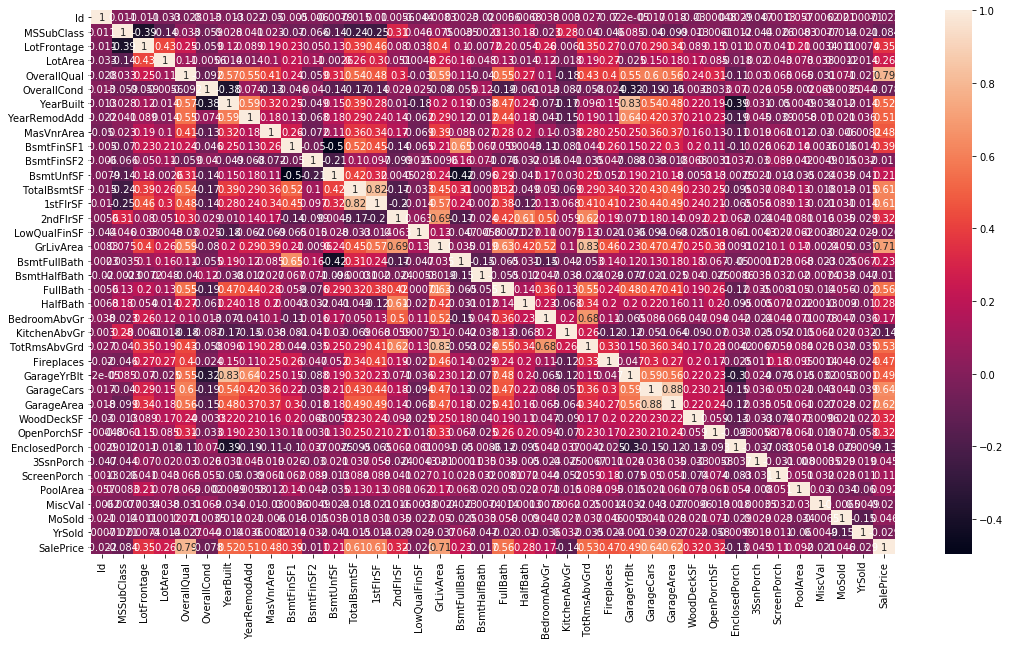

In [31]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

**Dummy Variables treatment**

In [32]:
# finding columns with categorical variables for dummy variable creation
house_data_categorical = house_data.select_dtypes('object')
house_data_categorical_list = house_data_categorical.columns.tolist()
house_data_categorical_list

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [33]:
#Create Dummy Variables for categorical type

# Creating a dummy variable for the variable 'MSZoning'
cont = pd.get_dummies(house_data['MSZoning'],prefix='MSZoning',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Alley'
cont = pd.get_dummies(house_data['Alley'],prefix='Alley',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'LotShape'
cont = pd.get_dummies(house_data['LotShape'],prefix='LotShape',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'LandContour'
cont = pd.get_dummies(house_data['LandContour'],prefix='LandContour',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'LandContour'
cont = pd.get_dummies(house_data['LandContour'],prefix='LandContour',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'LandSlope'
cont = pd.get_dummies(house_data['LandSlope'],prefix='LandSlope',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Neighborhood'
cont = pd.get_dummies(house_data['Neighborhood'],prefix='Neighborhood',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Condition1'
cont = pd.get_dummies(house_data['Condition1'],prefix='Condition1',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Condition2'
cont = pd.get_dummies(house_data['Condition2'],prefix='Condition2',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'BldgType'
cont = pd.get_dummies(house_data['BldgType'],prefix='BldgType',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'HouseStyle'
cont = pd.get_dummies(house_data['HouseStyle'],prefix='HouseStyle',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'RoofStyle'
cont = pd.get_dummies(house_data['RoofStyle'],prefix='RoofStyle',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'RoofMatl'
cont = pd.get_dummies(house_data['RoofMatl'],prefix='RoofMatl',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Exterior1st'
cont = pd.get_dummies(house_data['Exterior1st'],prefix='Exterior1st',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Exterior2nd'
cont = pd.get_dummies(house_data['Exterior2nd'],prefix='Exterior2nd',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'MasVnrType'
cont = pd.get_dummies(house_data['MasVnrType'],prefix='MasVnrType',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'ExterQual'
cont = pd.get_dummies(house_data['ExterQual'],prefix='ExterQual',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'ExterCond'
cont = pd.get_dummies(house_data['ExterCond'],prefix='ExterCond',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Foundation'
cont = pd.get_dummies(house_data['Foundation'],prefix='Foundation',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtQual'
cont = pd.get_dummies(house_data['BsmtQual'],prefix='BsmtQual',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtCond'
cont = pd.get_dummies(house_data['BsmtCond'],prefix='BsmtCond',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtExposure'
cont = pd.get_dummies(house_data['BsmtExposure'],prefix='BsmtExposure',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'BsmtFinType2'
cont = pd.get_dummies(house_data['BsmtFinType2'],prefix='BsmtFinType2',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Heating'
cont = pd.get_dummies(house_data['Heating'],prefix='Heating',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'HeatingQC'
cont = pd.get_dummies(house_data['HeatingQC'],prefix='HeatingQC',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'CentralAir'
cont = pd.get_dummies(house_data['CentralAir'],prefix='CentralAir',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Electrical'
cont = pd.get_dummies(house_data['Electrical'],prefix='Electrical',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'KitchenQual'
cont = pd.get_dummies(house_data['KitchenQual'],prefix='KitchenQual',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Functional'
cont = pd.get_dummies(house_data['Functional'],prefix='Functional',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'GarageType'
cont = pd.get_dummies(house_data['GarageType'],prefix='GarageType',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'GarageFinish'
cont = pd.get_dummies(house_data['GarageFinish'],prefix='GarageFinish',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'GarageQual'
cont = pd.get_dummies(house_data['GarageQual'],prefix='GarageQual',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'GarageCond'
cont = pd.get_dummies(house_data['GarageCond'],prefix='GarageCond',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'PavedDrive'
cont = pd.get_dummies(house_data['PavedDrive'],prefix='PavedDrive',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'Fence'
cont = pd.get_dummies(house_data['Fence'],prefix='Fence',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'SaleType'
cont = pd.get_dummies(house_data['SaleType'],prefix='SaleType',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

# Creating a dummy variable for the variable 'SaleCondition'
cont = pd.get_dummies(house_data['SaleCondition'],prefix='SaleCondition',drop_first=True)
#Adding the results to the master dataframe
house_data = pd.concat([house_data,cont],axis=1)

In [34]:
house_data.shape

(1112, 251)

In [35]:
#Drop the columns for which  dummies are ceated
house_data = house_data.drop(house_data_categorical_list,axis = 1)

In [36]:
house_data.shape

(1112, 213)

In [37]:
house_data.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


**Distribution of Target variable(SalePrice)**

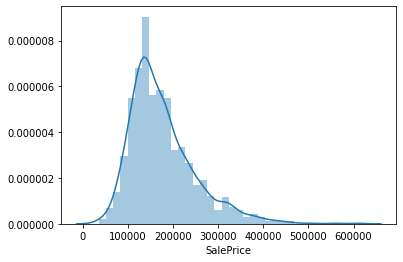

In [38]:
sns.distplot(house_data["SalePrice"])

**As the target varible distribution is skewed, it is required to transform**

In [39]:
y = np.log(house_data.SalePrice)

**The distribution of target variable is normal after applying the transformation**

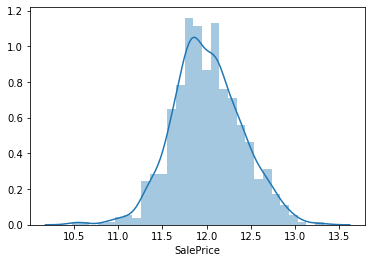

In [40]:
sns.distplot(y)

In [41]:
X = house_data.drop(["Id", "SalePrice"], axis=1)

In [42]:
#X = X.fillna(X.interpolate())

In [43]:
X.shape

(1112, 211)

In [44]:
y.shape

(1112,)

### 4. Model Building and Evaluation

**Split the dataset to Train and Test set**

In [45]:
# split to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

**Scaling  : Use Standard Scaler Fit Transform to scale the data**

In [46]:
# List of numerical features that need scaling are
features_require_scaling = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','2ndFlrSF',
                            'LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                             'ScreenPorch','PoolArea','MiscVal']

# Using Standard Scaler
scaler = StandardScaler()

# Fit and Transform on Train
X_train[features_require_scaling] = scaler.fit_transform(X_train[features_require_scaling])

#Tranform on Test
X_test[features_require_scaling] = scaler.transform(X_test[features_require_scaling])

### Ridge Regression

In [47]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [48]:
# Ridge Regression
ridge = Ridge()

# Defining number of cross folds
folds = 5
ridge_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [49]:
# Results from Ridge Model for different values of alpha and plot the graph
ridge_result = pd.DataFrame(ridge_model.cv_results_)
ridge_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006782,0.000399,0.001793,3.979676e-04,0.0001,{'alpha': 0.0001},-0.123147,-0.103993,-0.105118,-0.084700,...,-0.107092,0.013437,26,-0.064790,-0.068322,-0.064231,-0.072801,-0.067797,-0.067588,0.003061
1,0.005984,0.000892,0.001596,4.888313e-04,0.001,{'alpha': 0.001},-0.122381,-0.103941,-0.105123,-0.084687,...,-0.106918,0.013256,25,-0.064822,-0.068330,-0.064247,-0.072805,-0.067798,-0.067600,0.003054
2,0.005187,0.000747,0.001196,3.988752e-04,0.01,{'alpha': 0.01},-0.117804,-0.103567,-0.105176,-0.084563,...,-0.105830,0.012249,24,-0.065082,-0.068406,-0.064412,-0.072844,-0.067814,-0.067712,0.002988
3,0.006184,0.000746,0.001596,4.884414e-04,0.05,{'alpha': 0.05},-0.110844,-0.102483,-0.105195,-0.084083,...,-0.103829,0.010995,23,-0.065733,-0.068808,-0.064941,-0.073018,-0.067971,-0.068094,0.002839
4,0.007979,0.001093,0.001396,4.882859e-04,0.1,{'alpha': 0.1},-0.107136,-0.101573,-0.104959,-0.083590,...,-0.102490,0.010460,22,-0.066236,-0.069270,-0.065333,-0.073218,-0.068241,-0.068459,0.002759
5,0.007780,0.001595,0.001994,3.814697e-07,0.2,{'alpha': 0.2},-0.102847,-0.100322,-0.104345,-0.082939,...,-0.100731,0.009898,20,-0.066968,-0.069906,-0.065833,-0.073642,-0.068726,-0.069015,0.002706
6,0.005386,0.001017,0.001396,4.888122e-04,0.3,{'alpha': 0.3},-0.100364,-0.099254,-0.103760,-0.082472,...,-0.099515,0.009575,19,-0.067536,-0.070345,-0.066190,-0.073958,-0.069132,-0.069432,0.002665
7,0.006183,0.000399,0.001995,6.309775e-04,0.4,{'alpha': 0.4},-0.098513,-0.098330,-0.103238,-0.082166,...,-0.098566,0.009331,18,-0.067984,-0.070696,-0.066468,-0.074227,-0.069481,-0.069771,0.002642
8,0.006782,0.000746,0.001795,3.988269e-04,0.5,{'alpha': 0.5},-0.097040,-0.097519,-0.102745,-0.081893,...,-0.097764,0.009143,16,-0.068345,-0.071014,-0.066732,-0.074448,-0.069819,-0.070072,0.002617
9,0.007979,0.001893,0.001795,3.992331e-04,0.6,{'alpha': 0.6},-0.095895,-0.096802,-0.102289,-0.081666,...,-0.097096,0.008992,15,-0.068661,-0.071285,-0.066961,-0.074641,-0.070127,-0.070335,0.002595


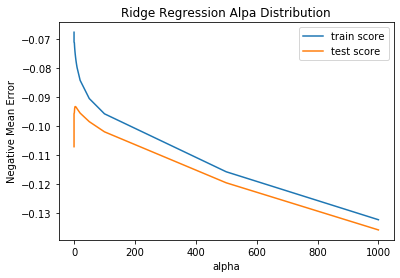

In [50]:
# Plot mean test and train scores for different Alpha values
ridge_result['param_alpha'] = ridge_result['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_result['param_alpha'], ridge_result['mean_train_score'])
plt.plot(ridge_result['param_alpha'], ridge_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Error')
plt.title("Ridge Regression Alpa Distribution")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### Ridge Regression Results report is arranged in allignment with subjective questions

**Question-1: What is the optimal value of alpha for ridge and lasso regression?**

In [51]:
#checking the value of optimum number of parameters
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 4.0}
-0.09323816815800681


In [52]:
cv_results = pd.DataFrame(ridge_model.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006782,0.000399,0.001793,3.979676e-04,0.0001,{'alpha': 0.0001},-0.123147,-0.103993,-0.105118,-0.084700,...,-0.107092,0.013437,26,-0.064790,-0.068322,-0.064231,-0.072801,-0.067797,-0.067588,0.003061
1,0.005984,0.000892,0.001596,4.888313e-04,0.001,{'alpha': 0.001},-0.122381,-0.103941,-0.105123,-0.084687,...,-0.106918,0.013256,25,-0.064822,-0.068330,-0.064247,-0.072805,-0.067798,-0.067600,0.003054
2,0.005187,0.000747,0.001196,3.988752e-04,0.01,{'alpha': 0.01},-0.117804,-0.103567,-0.105176,-0.084563,...,-0.105830,0.012249,24,-0.065082,-0.068406,-0.064412,-0.072844,-0.067814,-0.067712,0.002988
3,0.006184,0.000746,0.001596,4.884414e-04,0.05,{'alpha': 0.05},-0.110844,-0.102483,-0.105195,-0.084083,...,-0.103829,0.010995,23,-0.065733,-0.068808,-0.064941,-0.073018,-0.067971,-0.068094,0.002839
4,0.007979,0.001093,0.001396,4.882859e-04,0.1,{'alpha': 0.1},-0.107136,-0.101573,-0.104959,-0.083590,...,-0.102490,0.010460,22,-0.066236,-0.069270,-0.065333,-0.073218,-0.068241,-0.068459,0.002759
5,0.007780,0.001595,0.001994,3.814697e-07,0.2,{'alpha': 0.2},-0.102847,-0.100322,-0.104345,-0.082939,...,-0.100731,0.009898,20,-0.066968,-0.069906,-0.065833,-0.073642,-0.068726,-0.069015,0.002706
6,0.005386,0.001017,0.001396,4.888122e-04,0.3,{'alpha': 0.3},-0.100364,-0.099254,-0.103760,-0.082472,...,-0.099515,0.009575,19,-0.067536,-0.070345,-0.066190,-0.073958,-0.069132,-0.069432,0.002665
7,0.006183,0.000399,0.001995,6.309775e-04,0.4,{'alpha': 0.4},-0.098513,-0.098330,-0.103238,-0.082166,...,-0.098566,0.009331,18,-0.067984,-0.070696,-0.066468,-0.074227,-0.069481,-0.069771,0.002642
8,0.006782,0.000746,0.001795,3.988269e-04,0.5,{'alpha': 0.5},-0.097040,-0.097519,-0.102745,-0.081893,...,-0.097764,0.009143,16,-0.068345,-0.071014,-0.066732,-0.074448,-0.069819,-0.070072,0.002617
9,0.007979,0.001893,0.001795,3.992331e-04,0.6,{'alpha': 0.6},-0.095895,-0.096802,-0.102289,-0.081666,...,-0.097096,0.008992,15,-0.068661,-0.071285,-0.066961,-0.074641,-0.070127,-0.070335,0.002595


**The optimal value of alpha for Ridge regression model is 7**

**Question-1: What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?**

In [53]:
# check the coefficient values with alpha = 7

alpha = 7
ridge_7 = Ridge(alpha=alpha)

ridge_7.fit(X_train, y_train)
ridge_7.coef_

array([ 3.16835072e-06,  1.34488735e-02, -5.20430737e-03,  4.21709566e-02,
        1.36003892e-03, -2.75101792e-03,  4.14907100e-02,  2.04511117e-04,
        7.18794349e-02,  0.00000000e+00,  6.47989306e-02,  1.07307449e-04,
        1.77917473e-02,  1.68590006e-02,  8.83292789e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.13561565e-02,
        5.07182791e-02,  4.84588746e-02,  1.57678010e-02, -2.58247204e-02,
       -4.77128633e-02, -2.06502973e-03, -1.03424305e-02, -8.46856148e-03,
        1.55043906e-02, -3.00014539e-02,  6.36508323e-03,  1.55043906e-02,
       -3.00014539e-02,  6.36508323e-03,  5.47520955e-03, -2.44285344e-02,
       -7.29621310e-03,  4.80021215e-03, -7.26501157e-03,  2.02969429e-02,
       -1.87723844e-02,  1.11377352e-01, -6.15053964e-02,  3.73761861e-03,
       -8.99339859e-02, -9.45652558e-02, -2.55291436e-02, -2.49768946e-02,
        2.62163091e-02, -1.05879066e-02,  1.16231799e-02,  5.25035554e-02,
       -7.57213191e-02,  

In [54]:
#Predict the R-squared value of train data
y_train_pred = ridge_7.predict(X_train)
print(">>> Optimal Ridge model R2 score on Training data is " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

>>> Optimal Ridge model R2 score on Training data is 0.9193653250881583


In [55]:
#Predict the R-squared value of test data
y_test_pred = ridge_7.predict(X_test)
print(">>> Optimal Ridge model R2 score on Test data is " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

>>> Optimal Ridge model R2 score on Test data is 0.9053375615906516


In [56]:
print(">>> Optimal Ridge model mean squared error on Test data is " + str(mean_squared_error(y_test, ridge_optimal.predict(X_test))))

NameError: name 'ridge_optimal' is not defined

In [ ]:
# Let us have a series to get the Optimal Ridge model variable name and its coefficient value
ridge_7_coef = pd.Series(ridge_7.coef_, index = X_train.columns)
ridge_7_coef.sort_values(ascending=False).head(10)

In [ ]:
# Let's see how many variables were picked by Optimal Ridge model and how many were dropped
print("Optimal Ridge model picked " + str(sum(ridge_7_coef != 0)) + " variables and eliminated the other " +  str(sum(ridge_7_coef == 0)) + " variables")

In [ ]:
# check the coefficient values with alpha = 14

alpha = 14
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

In [ ]:
#Predict the R-squared value of train data
y_train_pred = ridge.predict(X_train)
print(">>> Ridge model R2 score on Training data is " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

In [ ]:
#Predict the R-squared value of test data
y_test_pred = ridge.predict(X_test)
print(">>> Ridge model R2 score on Test data is " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

In [ ]:
# Check the mean squared error
print(">>> Ridge model mean squared error on Test data is " + str(mean_squared_error(y_test, ridge.predict(X_test))))

In [ ]:
# Let us have a series to get the 14 Ridge model variable name and its coefficient value
ridge_14_coef = pd.Series(ridge.coef_, index = X_train.columns)
ridge_14_coef.sort_values(ascending=False).head(10)

In [ ]:
# Let's see how many variables were picked by Optimal Ridge model and how many were dropped
print("Optimal Ridge model picked " + str(sum(ridge_14_coef != 0)) + " variables and eliminated the other " +  str(sum(ridge_14_coef == 0)) + " variables")

In [ ]:
# Let us have a series to get the 7 Ridge model variable name and its coefficient value
ridge_7_coef.sort_values(ascending=False).head(10)

In [ ]:
# Let's see how many variables were picked by ridge model and how many were dropped
print("***Ridge model picked " + str(sum(ridge_7_coef != 0)) + " variables and eliminated the other " +  str(sum(ridge_7_coef == 0)) + " variables")

#### **From the above results, below observations are made**<br>
1. Optimal alpha is given as 7 by the Ridge model <br>
2. With alpha as 7, the optimal Ridge model is built and observed R2 score as 0.9240693099823154 and 0.9057943299229592 for train and test set respectively <br>
3. With double value for optimal alpha i.e. 14, the Ridge model is built and observed almost same R2 score as with alpha = 14. R2 score as 0.9182904577352086 and 0.906528763400075 for train and test set respectively <br>
4. The number of coefficients picked by the model is 354 w.r.t Optimal Ridge model(alpha=7) as well as with Ridge model(alpha=14)
4. Top 10 Ridge coefficients are listed for both Optimal Ridge model(alpha=7) and Ridge model(alpha=14) and it is observed that Top-9 features are matching with either models

### Lasso Regression

In [ ]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train)

In [ ]:
lasso_result = pd.DataFrame(lasso_model.cv_results_)
lasso_result.head()

In [ ]:
# Plot mean test and train scores for different Alpha values
lasso_result['param_alpha'] = lasso_result['param_alpha'].astype('int32')

# plotting
plt.plot(lasso_result['param_alpha'], lasso_result['mean_train_score'])
plt.plot(lasso_result['param_alpha'], lasso_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Lasso Regression Alpa Distribution")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### Lasso Regression Results report is arranged in allignment with subjective questions

**Question-1: What is the optimal value of alpha for ridge and lasso regression?**

In [ ]:
#checking the value of optimum number of parameters
print(lasso_model.best_params_)
print(lasso_model.best_score_)

**The optimal value of alpha for Lasso regression model is 0.001**

**Question-1: What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?**

In [ ]:
# check the coefficient values with alpha = 0.001

alpha = 0.001
lasso_optimal = Lasso(alpha=alpha)

lasso_optimal.fit(X_train, y_train)
lasso_optimal.coef_

In [ ]:
#Predict the R-squared value of train data
y_train_pred = lasso_optimal.predict(X_train)
print(">>> Optimal Lasso model R2 score on Training data is " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

In [ ]:
#Predict the R-squared value of test data
y_test_pred = lasso_optimal.predict(X_test)
print(">>> Optimal Lasso model R2 score on Test data is " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

In [ ]:
print(">>> Optimal Lasso model mean squared error on Test data is " + str(mean_squared_error(y_test, lasso_optimal.predict(X_test))))

In [ ]:
# check the coefficient values with alpha double the optimal value = 0.002

alpha = 0.002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

In [ ]:
#Predict the R-squared value of train data
y_train_pred = lasso.predict(X_train)
print(">>> Lasso model R2 score on Training data is " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

In [ ]:
#Predict the R-squared value of test data
y_test_pred = lasso.predict(X_test)
print(">>> Lasso model R2 score on Test data is " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

In [ ]:
# Check the mean squared error
print(">>> Lasso model mean squared error on Test data is " + str(mean_squared_error(y_test, lasso.predict(X_test))))

In [ ]:
# Let us have a series to get the Optimal Ridge model variable name and its coefficient value
lasso_optimal_coef = pd.Series(lasso_optimal.coef_, index = X_train.columns)
lasso_optimal_coef.sort_values(ascending=False).head(10)

In [ ]:
# Let's see how many variables were picked by Optimal Lasso model and how many were dropped
print(">>> Optimal Lasso model picked " + str(sum(lasso_optimal_coef != 0)) + " variables and eliminated the other " +  str(sum(lasso_optimal_coef == 0)) + " variables")

In [ ]:
# Let us have a series to get the Lasso model variable name and its coefficient value
lasso_coef = pd.Series(lasso.coef_, index = X_train.columns)
lasso_coef.sort_values(ascending=False).head(10)

In [ ]:
# Let's see how many variables were picked by Lasso model and how many were dropped
print(">>> Lasso model picked " + str(sum(lasso_coef != 0)) + " variables and eliminated the other " +  str(sum(lasso_coef == 0)) + " variables")

**From the above results, below observations are made**<br>
1. Optimal alpha is given as 0.001 by the Lasso model
2. With alpha as 0.001, the optimal Lasso model is built and observed R2 score as 0.9059046554824034 and 0.9059076655453088 for train and test set respectively
3. With double value for optimal alpha i.e.0.002, the Lasso model is built and observed almost same R2 score as with alpha=0.001. R2 score as 0.8883150986895424 and 0.8939269443468543 for train and test set respectively
4. The number of coefficients picked by the model is 108 w.r.t Optimal Lasso model(alpha=0.001) and 70 w.r.t Lasso model(alpha=0.002)
5. Top 10 Lasso coefficients are listed for both Optimal Lasso model(alpha=0.001) and Lasso  model(alpha=0.002) and it is observed that 7 features are matching with either models though the top features match

**Question-3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [ ]:
# Top5 optimal lasso model features
top5_optimal_lasso_model_features = ['CentralAir_Y','2ndFlrSF','SaleCondition_Partial','Functional_Typ','Neighborhood_StoneBr']

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Drop the top5 optimal lasso model features
X_train.drop(top5_optimal_lasso_model_features, axis=1, inplace=True)
X_test.drop(top5_optimal_lasso_model_features, axis=1, inplace=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
lasso_new = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_new.fit(X_train, y_train)

In [ ]:
lasso_new_result = pd.DataFrame(lasso_new.cv_results_)
lasso_new_result.head()

In [ ]:
# Plot mean test and train scores for different Alpha values
lasso_new_result['param_alpha'] = lasso_new_result['param_alpha'].astype('int32')

# plotting
plt.plot(lasso_new_result['param_alpha'], lasso_new_result['mean_train_score'])
plt.plot(lasso_new_result['param_alpha'], lasso_new_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Updated Lasso Regression Alpa Distribution")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
#checking the value of optimum number of parameters
print(lasso_new.best_params_)
print(lasso_new.best_score_)

In [ ]:
# check the coefficient values with alpha = 0.001

alpha = 0.001
lasso_new = Lasso(alpha=alpha)

lasso_new.fit(X_train, y_train)
lasso_new.coef_

In [ ]:
# Let us have a series to get the New Lasso model variable name and its coefficient value
lasso_new_coef = pd.Series(lasso_new.coef_, index = X_train.columns)
lasso_new_coef.sort_values(ascending=False).head(10)

**After removing Top-5 features, New Lasso model yield new Top-3 features ['GrLivArea','SaleType_New','Neighborhood_Crawfor'] that are not even in the top-10 list earlier**

In [ ]:
# Let's see how many variables were picked by New Lasso model and how many were dropped
print(">>> New Lasso model picked " + str(sum(lasso_new_coef != 0)) + " variables and eliminated the other " +  str(sum(lasso_new_coef == 0)) + " variables")

In [ ]:
#Predict the R-squared value of train data
y_train_pred = lasso_new.predict(X_train)
print(">>> New Lasso model R2 score on Training data is " + str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

In [ ]:
#Predict the R-squared value of test data
y_test_pred = lasso_new.predict(X_test)
print(">>> New Lasso model R2 score on Test data is " + str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

In [ ]:
# Check the mean squared error
print(">>> New Lasso model mean squared error on Test data is " + str(mean_squared_error(y_test, lasso_new.predict(X_test))))

In [ ]:
# Thank you - Rama Boya